# Act102 - Mathématiques actuarielles fondamentales de l'assurance vie

## Cours Table de Mortalité - Partie 3

Guillaume Gorge 2022
Cours du CNAM

<!-- https://www.markdownguide.org/basic-syntax/ -->


## Initialisation

#### Initialisation du système python

In [373]:
#import sys
#Stat Panda
#!pip install ipywidgets
#!{sys.executable} -m pip install pandas_profiling 
#Stat Assurance vie
#!{sys.executable} -m pip install lifelines    
#!{sys.executable} -m pip install seaborn  
#!{sys.executable} -m pip install xlrd
#!{sys.executable} -m pip install plotnine
#pip install pylexis


In [374]:
# Necessaire en Colab pour fonctionner avec Pandas excel
#!pip install xlrd==1.2.0

#!pip install xlrd

#!pip install  matplotlib -U
#!pip install pylexis

In [375]:
import os

import pylexis
from plotnine import ggplot, geom_point, aes, geom_violin,theme,theme_minimal,geom_jitter,geom_segment


# packages classiques pour gérer des données
import pandas as pd
import numpy as np
#option pour que les graphes apparaissent dans Jupyter
%matplotlib inline 
# graphiques
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
#option pour que les graphes apparaissent dans Jupyter

# Stat sur Panda
import pandas_profiling 
import ipywidgets

#### Adresse des répertoires
Adresse à personnaliser selon environnement

In [6]:
# Environnement Local - ATTENTION CHOISIR l'environnement COLAB ou l'ENVIRONNEMENT LOCAL
BASE_PATH = 'C:/Users/guill/GitHub/RessourcesActuariat/ActuariatVieCNAM/DataActuariat'

In [376]:
# image and mask directories
DataName = f'{BASE_PATH}/FD_DEC_2019.csv'
VarName = f'{BASE_PATH}/varmod_DEC_2019.csv'
DataNameExpo = f'{BASE_PATH}/pop-totale-france-metro.xls'
DataTableINSEEName = f'{BASE_PATH}/EvolutionTable3.xlsx'
Haberman = f'{BASE_PATH}/haberman.csv'

### Lecture de la base des tables de mortalité de l'INSEE
L'INSEE propose des tables brutes de mortalité (comme celles que nous avons calculées), qui nous permettent de voir l'évolution de la mortalité et de tester des tables prospectives.

In [ ]:
[Source : T68](https://www.insee.fr/fr/statistiques/5390366?sommaire=5390468#consulter-sommaire)

In [90]:
xls = pd.ExcelFile(DataTableINSEEName)
# Now you can list all sheets in the file
for index,name in enumerate(xls.sheet_names):
    # ['house', 'house_extra', ...]
    df = pd.read_excel(DataTableINSEEName,sheet_name=name) 
    df['Annee'] = name
    # to read just one sheet to dataframe:
    if index == 0:
        TableEvolution = df
    else:
        TableEvolution = pd.concat([TableEvolution,df])

In [105]:
TableEvolutionM = TableEvolution.rename(columns={'SxM': 'Sx', 'QxM': 'Qx','EvxM': 'EVx'})
TableEvolutionM['Sexe']=1
TableEvolutionF = TableEvolution.rename(columns={'SxF': 'Sx', 'QxF': 'Qx','EvxF': 'EVx'})
TableEvolutionF['Sexe']=2
TableEvolutionT = pd.concat([TableEvolutionF,TableEvolutionM],join='outer',keys=['Annee','Age','Sexe'])[['Annee','Age','Sexe','Sx','Qx','EVx']]
TableEvolutionT['Annee']=pd.to_numeric(TableEvolutionT['Annee'])
# Calcul de MUx
TableEvolutionT['Qx'] = TableEvolutionT['Qx'] / 100000
TableEvolutionT['MUx'] = -np.log(-(TableEvolutionT['Qx']-1))
display(TableEvolutionT)

Annee  Age  Sexe      Sx       Qx      EVx       MUx
Annee 0     1977    0     2  100000  0.01096  77.2947  0.011021
      1     1977    1     2   98904  0.00089  77.1456  0.000890
      2     1977    2     2   98816  0.00058  76.2142  0.000580
      3     1977    3     2   98759  0.00046  75.2578  0.000460
      4     1977    4     2   98714  0.00035  74.2914  0.000350
...          ...  ...   ...     ...      ...      ...       ...
Age   100   2019  100     1    1412  0.33831   2.7162  0.412958
      101   2019  101     1     934  0.34405   2.8493  0.421671
      102   2019  102     1     613  0.36463   3.0816  0.453548
      103   2019  103     1     389  0.33356   3.5631  0.405805
      104   2019  104     1     260  0.25623   4.0963  0.296023

[8642 rows x 7 columns]

C:\Users\guill\AppData\Local\Temp\ipykernel_48772\1785529064.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Text(0.5, 1.0, "Evolution de l'espérance de Vie d'une femme de 90 ans selon l'année t")

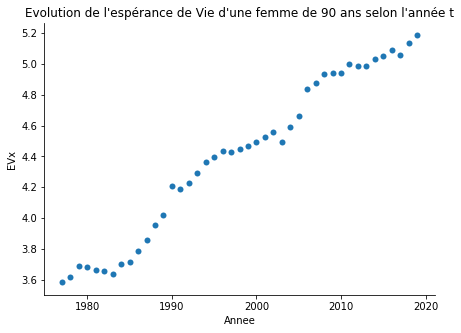

In [99]:
RenteJeanneCalment = TableEvolutionT.loc[(TableEvolutionT['Age']==90)&((TableEvolutionT['Sexe']==2))]
 
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
sns.scatterplot(data=RenteJeanneCalment,x='Annee', y='EVx',  
                sizes=(1, 8), linewidth=0,
                  ax=ax)    
ax.set_title("Evolution de l'espérance de Vie d'une femme de 90 ans selon l'année t")


On voit l'espérance de vie de Jeanne Calment à 90 ans augmenter de 3.6 ans à 5.2 ans sur la période.

Text(0.5, 1.0, "Evolution de l'espérance de Vie d'un homme de 51 ans selon l'année t")

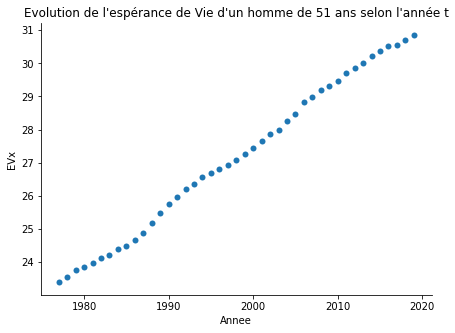

In [103]:
RenteProfesseur = TableEvolutionT.loc[(TableEvolutionT['Age']==51)&((TableEvolutionT['Sexe']==1))]

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
sns.scatterplot(data=RenteProfesseur,x='Annee', y='EVx',  
                sizes=(1, 8), linewidth=0,
                  ax=ax)    
ax.set_title("Evolution de l'espérance de Vie d'un homme de 51 ans selon l'année t")

## Essai de Graphe de Lexis

Annee  Age       MUx
Annee 0    1977    0  0.011021
      1    1977    1  0.000890
      2    1977    2  0.000580
      3    1977    3  0.000460
      4    1977    4  0.000350
...         ...  ...       ...
      95   2019   95  0.227202
      96   2019   96  0.255705
      97   2019   97  0.282482
      98   2019   98  0.317509
      99   2019   99  0.341561

[4300 rows x 3 columns]

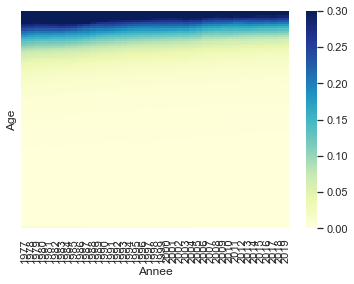

In [358]:
# mise au format en enlevant toutes les années avec des données manquantes
df=       TableEvolutionT[(TableEvolutionT['Sexe']==2)&(TableEvolutionT['Age']<100)][['Annee','Age','MUx']] 
display(df)
rate = pd.pivot_table(df, values='MUx', index=['Age'],
                    columns=['Annee'], aggfunc=np.mean)
T=np.shape(rate)[0]
 
# Age x
N=np.shape(rate)[1]
 

#ax = sns.heatmap(rate, vmin=0, vmax=0.5,cmap="YlGnBu")
sns.heatmap(rate, xticklabels=True, yticklabels=False, annot = False,vmin=0, vmax=0.3,cmap="YlGnBu")
plt.ylim(0,T)
plt.xlim(0,N)
plt.show()
#ax.yaxis_inverted() 
#ax.fig.axes[0].invert_yaxis()
#plt.show()

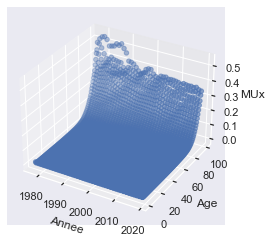

In [359]:
#!pip install ipywidgets
#!jupyter nbextension enable --py widgetsnbextension
 
#import ipywidgets as widgets
 
 
sns.set(style = "darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')


x=pd.to_numeric( df['Annee'])
y=pd.to_numeric( df['Age'])
z=pd.to_numeric( df['MUx'])

ax.set_xlabel("Annee")
ax.set_ylabel("Age")
ax.set_zlabel("MUx")

ax.scatter(x, y, z)

plt.show()
 

# Lee Carter

[article](http://pagesperso.univ-brest.fr/~ailliot/doc_cours/M1EURIA/regression/leecarter.pdf)


Il s’agit d’une méthode d’extrapolation des tendances passées. La modélisation retenue pour le taux instantané de mortalité est la
suivante :
$$ ln \mu_{xt} = \alpha_{x} + \beta_x k_t$$

## méthode directe
[ implementation en Python -author="Andy Chen",](https://github.com/andy971022/leecarter/blob/master/leecarter/leecarter.py) même si nous proposons une approche à partir du GLM

In [360]:
 

def lee_carter(rate, T, N, misc=False):
   
    logm_xt = np.log(rate).T
   

    # Alpha est la moyenne des alpha x
    a_x = logm_xt.sum(axis=1) / T
   
    # z_xt est une regression "nestée" (on travaille sur le résidu)
  
    z_xt = logm_xt - a_x.reshape(N, 1)
    # Singular Value Decomposition.
    U, S, V = np.linalg.svd(z_xt, full_matrices=True)

    bxkt = S[0] * np.dot(U[:, 0].reshape(N, 1), V[0, :].reshape(T, 1).T)
    eps = z_xt - bxkt

    logm_xt_lcfitted = bxkt + a_x.reshape(N, 1)

    b_x = U[:, 0]/U[:, 0].sum()
    k_t = V[0, :]*S[0]*U[:, 0].sum()
    a_x = a_x + k_t.sum()*b_x
    k_t = k_t - k_t.sum()

    kwargs = {"U": U, "S": S, "V": V, "logm_xt": logm_xt,
              "z_xt": z_xt, "eps": eps, "logm_xt_lcfitted": logm_xt_lcfitted}

    return (a_x, b_x, k_t, kwargs) if misc else (a_x, b_x, k_t)



In [362]:

rate = pd.pivot_table(df, values='MUx', index=['Annee'],
                    columns=['Age'], aggfunc=np.mean).to_numpy()

#Nombre d'année t
T=np.shape(rate)[0]

# Age x
N=np.shape(rate)[1]

#T = df['Age'].to_numpy().reshape((4321,1))
a_x, b_x, k_t =lee_carter(rate, T, N)

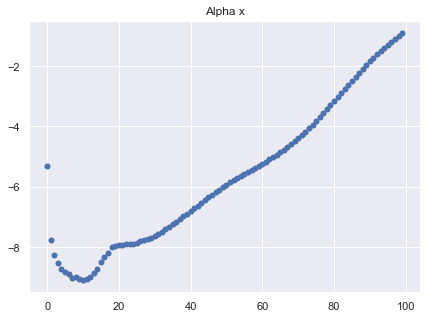

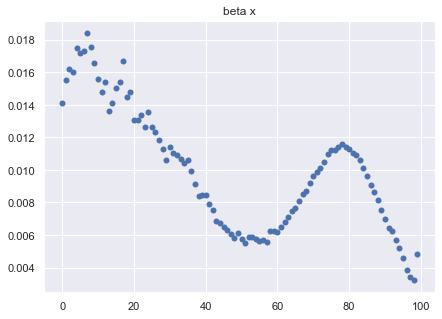

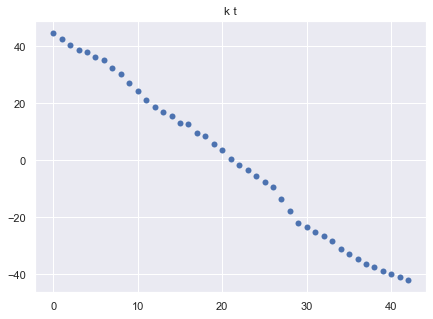

In [363]:


f, ax = plt.subplots(figsize=(7, 5))
sns.scatterplot(x=np.arange(N), y=a_x,linewidth=0,ax=ax)
ax.set_title("Alpha x")
plt.show()
f, ax = plt.subplots(figsize=(7, 5))
sns.scatterplot(x=np.arange(N), y=b_x,linewidth=0,ax=ax)
ax.set_title("beta x")
plt.show()
f, ax = plt.subplots(figsize=(7, 5))
sns.scatterplot(x=np.arange(T), y=k_t,linewidth=0,ax=ax)
ax.set_title("k t")
plt.show()

* Comme attendu, on a Alpha qui augmente, passé les 20 ans. On voit la hausse à 20 ans (même chez les femmes) liées à la mortalité routière (essentiellement). Puis, hausse constante. L
* le paramètre beta est beaucoup moins stable. On voit beta très élevé à 80 ans : On a donc une forte amélioration de la mortalité sur cette période. Ce qui est étonnant, c'est qu'entre 50 et 60 ans, l'effet est moins net.
* quand à k t, il est assez stable (mais il n'y a pas 2020 !).

In [342]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
# module imports

from formulaic import model_matrix # permet d'utiliser des formules comme dans R
 
import statsmodels.api as sm

In [364]:
# Fonction permettant de grapher en scatter plot un ou deux graphes
def GraphiqueTaux(data,x1,y1,y2=None,y3=None,titre=None,Varhue=None):
    f, ax = plt.subplots(figsize=(7, 5))
    sns.despine(f)
    sns.scatterplot(data=data,x=x1, y=y1,
                hue=Varhue,      
                palette="ch:r=-.2,d=.3_r" ,label=y1,
                sizes=(1, 8), linewidth=0,
                  ax=ax)
    if y2 is not None:
        sns.scatterplot(data=data,x=x1, y=y2,    hue=Varhue,   
                palette="ch:r=-.2,d=.3_r" ,label=y2,
                sizes=(1, 8), linewidth=0,
                  ax=ax)
    if y3 is not None:
        sns.scatterplot(data=data,x=x1, y=y3,   hue=Varhue,   
                palette="ch:r=-.2,d=.3_r" ,label=y3,
                sizes=(1, 8), linewidth=0,
                  ax=ax)    
    ax.set_title(titre)
    ax.legend()     
    ax.set_yscale('log')

In [365]:
def CalculGLMGraph(dataEntree,formula,dist=sm.families.Poisson,Fonctionlien=sm.families.links.log(),monOffset=None,ImpressionInfluence=False,
                   VarY='MUx',VarXGraph='AGE',VarXGraphCateg='SEXE', VarPredict='MUxHat',  titre='Comparaison entre Mux observé et MUx Estimé',     
      ):
        # Mise en forme des données : on n'écrit pas sur la base d'entrée
        df = dataEntree.copy()
        y, X = model_matrix(formula,df) 

        # GLM proprement dite
        Result= sm.GLM(endog=y,exog=X,family=dist(link=Fonctionlien),offset=monOffset).fit()
        display(Result.summary())
        
        
        # Sortie des Stats d'influence (les points qui tirent les paramètres)
        if ImpressionInfluence is True:
            #Element d'influence
            influence = Result.get_influence(observed=False)
            cook_distance = influence.cooks_distance 
            (distance, p_value) = cook_distance
            f, ax = plt.subplots(figsize=(7, 5))
            sns.despine(f)
            sns.scatterplot(x=df[VarXGraph], y=df[VarY], hue=distance, size=distance, sizes=(50, 200), edgecolor='black', linewidth=1)
            ax.set_title('influence de chaque point') 
        
        # Variable prédite calculée pour chaque observation puis graphée
        df[VarPredict] = Result.predict(X,offset=monOffset)        
        GraphiqueTaux(data=df,x1=VarXGraph,y1=VarY,y2=VarPredict,Varhue=VarXGraphCateg,titre=titre)
 

* Le paramètre $\alpha$ (Age) s’interprète comme la valeur moyenne des $ ln( \mu_{xt})$   au cours du temps.
* le coefficient $\beta$ traduit la sensibilité de la mortalité instantanée à l’âge x par rapport à l’évolution générale $k_t$  qui est constante.  
Considérons d'abord un modèle où tous ces facteurs sont linéaires (proche d'un modèle de Gompertz + taux d'évolution fixe).

C:\Users\guill\anaconda3\envs\Cours\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:298: DomainWarning: The log link function does not respect the domain of the Binomial family.


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    MUx   No. Observations:                 4300
Model:                            GLM   Df Residuals:                     4297
Model Family:                Binomial   Df Model:                            2
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -328.26
Date:                Sun, 20 Mar 2022   Deviance:                       5.9905
Time:                        19:03:10   Pearson chi2:                     173.
No. Iterations:                     9   Pseudo R-squ. (CS):             0.1129
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.7896     10.887      1.358      0.174      -6.548      36.127
Age            0.1100      0.008     13.924      0.000       0.095       0.125
Annee         -0.0133      0.005     -2.449      0.014      -0.024      -0.003
==============================================================================
"""

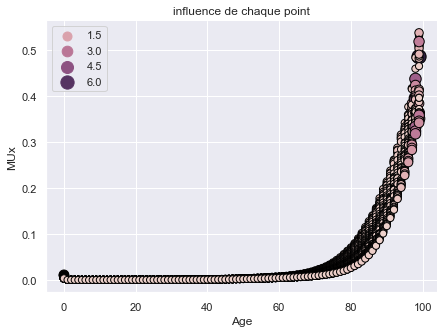

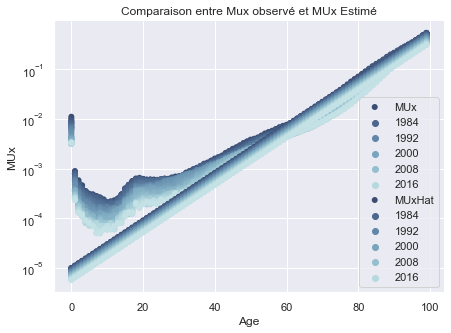

In [366]:

CalculGLMGraph(dataEntree=df,
         formula = formula,
         VarY='MUx',VarXGraph='Age',VarXGraphCateg='Annee', VarPredict='MUxHat',  
         titre='Comparaison entre Mux observé et MUx Estimé',     
         dist=sm.families.Binomial,Fonctionlien=sm.families.links.log(), ImpressionInfluence=True)  

In [367]:
from statsmodels.gam.api import GLMGam, BSplines
def CalculGAMGraph(y,X,
                   dist=sm.families.Poisson,Fonctionlien=sm.families.links.log(),ImpressionInfluence=False,
                   VarXGraph='AGE',VarXGraphCateg='SEXE', VarXSpline='AGE',monOffset=None,
                   VarPredict='MUxHat', 
                   titre='Comparaison entre Mux observé et MUx Estimé',      ):
        # Mise en forme des données : on n'écrit pas sur la base d'entrée
        df = X
        y = y
        X = X
        x_spline = X[VarXSpline]
        bs = BSplines(x_spline, df=[6], degree=[3])
     
        # penalization afin de ne pas surapprendre 
        alpha = np.array([0.5])
        model = sm.GLMGam(y,X,family=dist(link=Fonctionlien) ,smoother=bs,  alpha=alpha)
    
        Result = model.fit()
    
        # optimisation de l'hyper parametre alpha par méthode des kfold
        alpha_cv = model.select_penweight_kfold()[0]
        print("Alpha",alpha_cv)
        model = sm.GLMGam(y,X,family=dist(link=Fonctionlien) ,smoother=bs,  alpha=alpha_cv)
        Result = model.fit()
        display(Result.summary())
        # Partial Regression Plots
        
        fig = sm.graphics.plot_partregress_grid(Result)
        plt.show()
        
        
        # Sortie des Stats d'influence (les points qui tirent les paramètres)
        if ImpressionInfluence is True:
            #Element d'influence
            influence = Result.get_influence(observed=False)
            cook_distance = influence.cooks_distance 
            (distance, p_value) = cook_distance
            f, ax = plt.subplots(figsize=(7, 5))
            sns.despine(f)
            sns.scatterplot(x=df[VarXGraph], y=y, hue=distance, size=distance, sizes=(50, 200), edgecolor='black', linewidth=1)
            ax.set_title('influence de chaque point') 
        
        # Variable prédite calculée pour chaque observation puis graphée
        #df[VarPredict] = Result.predict(X,offset=monOffset)   
        df['y']=y
        
        df['yhat'] =Result.get_prediction().predicted_mean
  
        GraphiqueTaux(data=df,x1=VarXGraph,y1='y',y2='yhat',titre=titre)
        return Result


http://rstudio-pubs-static.s3.amazonaws.com/466062_fda07a1b42af4793b1f75e4b87435e3a.html Lee carter en R

C:\Users\guill\anaconda3\envs\Cours\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:298: DomainWarning: The log link function does not respect the domain of the Binomial family.


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    MUx   No. Observations:                 4321
Model:                            GLM   Df Residuals:                     4317
Model Family:                Binomial   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -337.32
Date:                Sun, 20 Mar 2022   Deviance:                       5.4631
Time:                        19:03:12   Pearson chi2:                     158.
No. Iterations:                     9   Pseudo R-squ. (CS):             0.1185
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     98.6810    110.051      0.897      0.370    -117.014     314.376
Age           -0.8003      1.176     -0.680      0.496      -3.106       1.505
Annee         -0.0553      0.055     -1.004      0.316      -0.163       0.053
Age:Annee      0.0005      0.001      0.774      0.439      -0.001       0.002
==============================================================================
"""

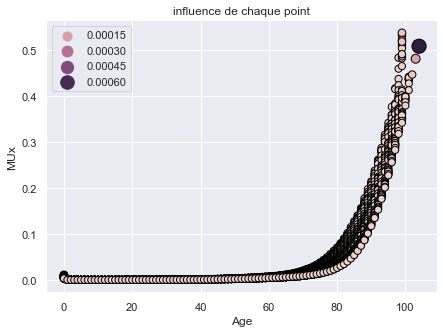

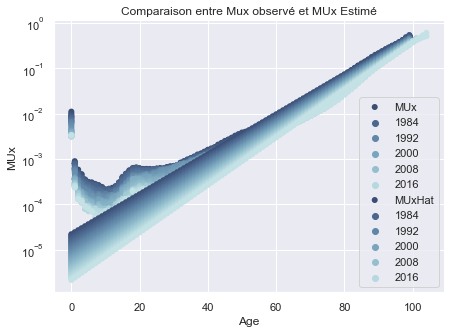

In [368]:
formula = 'MUx  ~  Age + Annee * Age'
df=       TableEvolutionT[(TableEvolutionT['Sexe']==2)] 
y, X = model_matrix(formula,df) 
X
CalculGLMGraph(dataEntree=df,
         formula = formula,
         VarY='MUx',VarXGraph='Age',VarXGraphCateg='Annee', VarPredict='MUxHat',  
         titre='Comparaison entre Mux observé et MUx Estimé',     
         dist=sm.families.Binomial,Fonctionlien=sm.families.links.log(), ImpressionInfluence=True)  


Alpha (25.118864315095795,)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    MUx   No. Observations:                 4321
Model:                         GLMGam   Df Residuals:                  4314.51
Model Family:                Binomial   Df Model:                         5.49
Link Function:                  logit   Scale:                          1.0000
Method:                         PIRLS   Log-Likelihood:                -335.51
Date:                Sun, 20 Mar 2022   Deviance:                       1.8397
Time:                        19:03:13   Pearson chi2:                     2.14
No. Iterations:                    12   Pseudo R-squ. (CS):             0.1192
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.6549      2.297     -2.897      0.004     -11.158      -2.152
Age            0.4258      0.155      2.742      0.006       0.121       0.730
Age:Annee     -0.0002   7.63e-05     -2.459      0.014      -0.000   -3.81e-05
Age_s0        -2.8924      3.747     -0.772      0.440     -10.236       4.451
Age_s1        -2.0265      2.258     -0.897      0.370      -6.453       2.400
Age_s2        -1.9367      1.077     -1.798      0.072      -4.048       0.175
Age_s3         0.5412      0.721      0.751      0.453      -0.872       1.954
Age_s4         1.7379      0.753      2.307      0.021       0.261       3.215
==============================================================================
"""

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


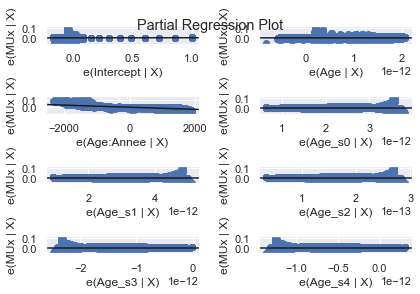

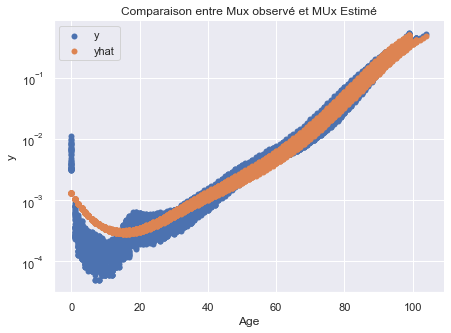

In [369]:
formula = 'MUx  ~  Age + Age : Annee'
df=       TableEvolutionT[(TableEvolutionT['Sexe']==2)] 
y, X = model_matrix(formula,df) 
X
CalculGAMGraph(y=y,
        X=X,
        VarXSpline=['Age'],
        VarXGraph ='Age',
        VarPredict='MUxHatspline',  
        titre='Comparaison entre Mux observé et MUx Estimé',     
        dist=sm.families.Binomial,Fonctionlien=sm.families.links.logit(), ImpressionInfluence=False)      

Alpha (125.89254117941663,)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    MUx   No. Observations:                 4321
Model:                         GLMGam   Df Residuals:                  4315.03
Model Family:                Binomial   Df Model:                         4.97
Link Function:                  logit   Scale:                          1.0000
Method:                         PIRLS   Log-Likelihood:                -335.49
Date:                Sun, 20 Mar 2022   Deviance:                       1.8002
Time:                        19:03:16   Pearson chi2:                     2.65
No. Iterations:                    12   Pseudo R-squ. (CS):             0.1192
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     27.6239     13.969      1.978      0.048       0.245      55.002
Age            0.0592      0.028      2.124      0.034       0.005       0.114
Annee         -0.0175      0.007     -2.535      0.011      -0.031      -0.004
Age_s0        -1.4068      2.334     -0.603      0.547      -5.982       3.168
Age_s1        -1.9591      2.294     -0.854      0.393      -6.455       2.537
Age_s2        -1.7379      0.947     -1.836      0.066      -3.593       0.117
Age_s3         0.4110      0.643      0.640      0.522      -0.848       1.670
Age_s4         1.5408      0.735      2.096      0.036       0.100       2.981
==============================================================================
"""

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


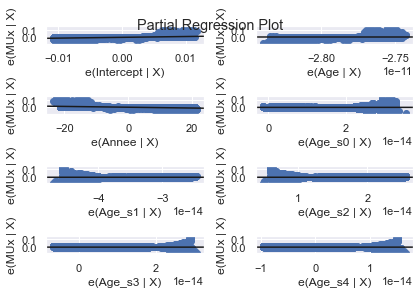

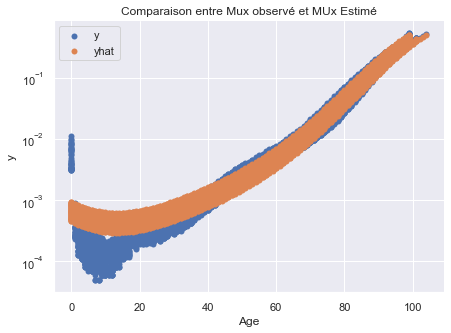

In [370]:
formula = 'MUx  ~  Age + Annee'
df=       TableEvolutionT[(TableEvolutionT['Sexe']==2)] 
y, X = model_matrix(formula,df) 
X
ResultsGAM = CalculGAMGraph(y=y,
        X=X,
        VarXSpline=['Age'],
        VarXGraph ='Age',
        VarPredict='MUxHatspline',  
        titre='Comparaison entre Mux observé et MUx Estimé',     
        dist=sm.families.Binomial,Fonctionlien=sm.families.links.logit(), ImpressionInfluence=False)    

import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt


import matplotlib.pyplot as plt
h = plt.contourf(x, y, z)
plt.axis('scaled')
plt.colorbar()
plt.show()

    



# Modèle de Cox : intégrer une information temporelle

[source Kaggle](https://www.kaggle.com/code/bryanb/survival-analysis-with-cox-model-implementation/notebook)

### Lecture de la base Haberman
Cette base contient les résultats d'une étude menée entre 1958 et 1970 à l'université de chicago sur la survie des personnes ayant eu un cancer du sein.
[lien original de la base](https://archive.ics.uci.edu/ml/datasets/haberman's+survival)

#### Les variables
*  Age du patient au moment de l'opération 
* l'année où le patient a été opéré
* Le nombre de ganglions lymphatiques infectés (axillary nodes)
* Le statut du patient 
  - 1 = le patient a survécu au delà de 5 ans
  - 2 = le patient est mort dans les 5 ans

In [377]:
  # Haberman
data = pd.read_csv(Haberman, names = ['Age','Operation_year','Nb_pos_detected','Surv'])
data.head(5)

,Age,Operation_year,Nb_pos_detected,Surv
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


#### import de Lifeline
https://lifelines.readthedocs.io/en/latest/
lifelines est une bibliothèque spécialisé dans les modèles de sruvie.

In [ ]:
from lifelines import CoxPHFitter
from lifelines import KaplanMeierFitter

#### Quelques définitions : la fonction de Risque (Hasard)
La fonction de risque est définie comme la probabilité que le sujet subisse un événement (mort mais d'autres états sont possibles comme la maladie, arrêt de travail, tout état intéressant l'assureur) dans un petit intervalle de temps, à condition que l'individu ait survécu jusqu'au début de cet intervalle. 

C'est le taux instantané calculé sur une période de temps .

Pratiquement, on le calcule ainsi : 
$$ \frac{\text{Nombre de personnes subissant un événement dans l'intervalle commençant au temps t}}{\text{nombre de sujets survivants au temps t}  . \Delta t}$$


$$ h(t)=lim _{\delta t \rightarrow 0} \frac{Pr(t≤T≤t+\delta t|T>t)}{\delta t}  $$
 


#### Fonction censurée
Les observations sont dites censurées lorsque l'information sur leur temps de survie est incomplète. Cela se produit lorsque le sujet n'est plus observé avant qu'il n'ait vécu l'événement qui l'intéresse. Cela peut être dû soit à la fin de la période d'observation, soit à la survenance d'un autre événement empêchant l'observation de l'événement d'intérêt (par exemple, le patient n'est plus suivi par le médecin car il a déménagé). 
* censure à droite : Dans un contexte d'assurance, l'arrêt du contrat décès du fait d'un remboursement anticipé du prêt.
* censure à gauche : par exemple, le fait que les assureurs fassent des tests poussés sur l'état de santé avant de proposer uen assurance.  

### Approche univariée : Estimateur de Kaplan Meier
l'estimateur de Kaplan-Meier est utilisé pour les fonctions de survie, en mesurant la partie des personnes survivantes à $t$. Un avantage important de la courbe de Kaplan-Meier est que cette méthode peut prendre en compte certains types de données censurées.

Trois hypothèses sont sous-jacentes au modèle KM  :

1. Les sujets censurés ont les mêmes perspectives de survie que ceux qui continuent à être suivis (pas de biais de sélection). Par exemple, les personnes qui remboursent un prêt de façon anticipée ne doivent pas avoir une espérance de vie différentes de ceux qui ne remboursent pas.
2. La probabilité de survie est la même pour tous les sujets, quel que soit le moment où ils sont recrutés dans l'étude.
3. La date de l'événement est connue avec précision. C'est probablement le cas pour la mort du patient mais si c'est une récidive, cette hypothèse n'est pas forcément respectée si la fréquence d'examen n'est pas très fréquente.



#### Courbe de Meier Kaplan
La représentation visuelle de cette fonction est généralement appelée courbe de Kaplan-Meier. Il montre la probabilité d'un événement en fonction du temps. Si la taille de l'échantillon est suffisamment grande, la courbe doit se rapprocher de la vraie fonction de survie pour la population étudiée. La probabilité de survie à un moment donné est calculée comme le nombre de sujets survivants divisé par le nombre de personnes à risque. Les sujets censurés ne sont pas comptés dans le dénominateur. L'équation est donnée comme suit :

$$S(t)= \prod_{t_i,t} \frac{n_i-d_i}{n_i}  $$
 

* $n_i$ représente le nombre de personne à risque à t . 
* $d_i$ représente le nombre  de l'événement d'intérêt au temps t .

<AxesSubplot:xlabel='timeline'>

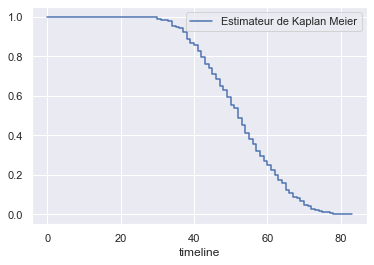

In [381]:
T = data.Age
E = data.Surv

## creation d'un objet kmf
km = KaplanMeierFitter() 

## estimer le modèle d'après les données
km.fit(T, E,label='Estimateur de Kaplan Meier')

## Create un estimateur
km.plot(ci_show=False) ## ci_show donne l'intervalle de confiance mais la base étant trop petite, on ne l'indique pas. 

> Sur le graphique, les petits traits verticaux indiquent ces censures (au niveau de 35 par exemple). Si aucune troncature ou censure n’intervient, la courbe de Kaplan-Meier est équivalente à la fonction de survie.

<AxesSubplot:xlabel='timeline'>

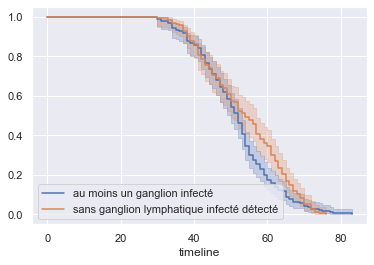

In [382]:
## creation d'un  nouvel objet kmf
km_2 = KaplanMeierFitter()

## creation de deux cohortes : ceux avec au moins un ganglion infecté et ceux sans ganglion lymphatique infecté
groups = data['Nb_pos_detected']   
i1 = (groups >= 1)   
i2 = (groups < 1)     


## fit the model for 1st cohort
km_2.fit(T[i1], E[i1], label='au moins un ganglion infecté')
a1 = km_2.plot()

## fit the model for 2nd cohort
km_2.fit(T[i2], E[i2], label='sans ganglion lymphatique infecté détecté')
km_2.plot(ax=a1)

### La régression de Cox (modèle à risque proportionnel)
Les modèles de survie étudient le temps écoulé avant qu'un événement ne survienne. Historiquement, dans le modèle de Cox, cet événement est le décès de l'individu, c'est pourquoi on parle généralement de survie et de décès. Au cours des années, l'utilisation du modèle s'est étendue à d'autres situations, l'événement peut donc être de quelconque nature : il peut s'agir de la récidive d'une maladie, ou à l'inverse d'une guérison. D'un point de vue statistique, la nature de l'événement n'est bien sûr pas importante, il s'agira alors d'interpréter les coefficients en conséquence.
[wikipedia](https://fr.wikipedia.org/wiki/R%C3%A9gression_de_Cox)

Hypothèse des risques proportionnels
Il s'agit d'une hypothèse forte du modèle de Cox, il faut donc au préalable vérifier que celle-ci est satisfaite. Pour chaque covariable, on teste alors si son effet est indépendant du temps. Cet effet doit être constant, ce qui signifie qu'il peut être bénéfique, nocif ou simplement nul. Il existe différentes méthodes pour vérifier si l'hypothèse des risques proportionnels est satisfaite. 

La regression de Cox conserve l'estimateur de Kaplan-Meier mais l'applique au cadre d'une régression afin de déterminer les facteurs explicatifs de survie.


La formule du modèle de Cox est donnée comme suit :


$$h(t|x)=b_0(t)exp \sum_{i=1}^n b_i(x_i)$$
 
Le modèle fonctionne de telle sorte que le log-risque d'un sujet individuel est une fonction linéaire de ses covariables statiques (équivalent à cela à un modèle GLM avec fonction link log) et une fonction de risque de base au niveau de la population qui change avec le temps. Ces covariables peuvent être estimées par vraisemblance partielle.

* $t$ représente le temps de survie, le risque peut varier dans le temps.

* $h(t)$ est la fonction de hasard déterminée par un ensemble de n covariables (x1,x2,...,xn) .

* $b_0(t)$ est la fonction de risque de base et est définie comme la probabilité de vivre l'événement d'intérêt lorsque toutes les autres covariables sont égales à zéro. C'est la seule composante dépendante du temps dans le modèle. Le modèle ne fait aucune hypothèse sur la fonction de risque de base et prend une forme paramétrique pour l'effet des covariables sur le risque.

* $\sum_{i=1}^n b_i(x_i)$ est le risque partiel, un facteur scalaire invariant dans le temps qui ne fait qu'augmenter ou diminuer le risque de base. Il est similaire à l'ordonnée à l'origine dans la régression ordinaire. Les covariables ou les coefficients de régression x donnent le changement proportionnel auquel on peut s'attendre dans le risque.

* les coefficients $(b_1,b_2,...,b_n)$ mesurent l'effet des covariables. si $b_i$ est positif, cela indique une dégradation du risque pour la patient.

In [384]:
# Create Model
cph = CoxPHFitter()

# Fit the data to train the model
cph.fit(data, 'Age', event_col='Surv')

# Have a look at the significance of the features
cph.print_summary()

C:\Users\guill\anaconda3\envs\Cours\lib\site-packages\lifelines\utils\printer.py:62: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.


<lifelines.CoxPHFitter: fitted with 306 total observations, 0 right-censored observations>
             duration col = 'Age'
                event col = 'Surv'
      baseline estimation = breslow
   number of observations = 306
number of events observed = 306
   partial log-likelihood = -1446.95
         time fit was run = 2022-03-20 19:41:01 UTC

---
                  coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                               
Operation_year   -0.02       0.98       0.02            -0.06             0.01                 0.94                 1.01
Nb_pos_detected   0.01       1.01       0.01            -0.00             0.03                 1.00                 1.03

                  cmp to     z    p   -log2(p)
covariate                                     
Operation_year      0.00 -1.39 0.16       2.61
Nb_pos_detected     0.00  1.70 0.09       3.47
---
Concordance = 0.53
Partial AIC = 2897.90
log-likelihood ratio test = 4.50 on 2 df
-log2(p) of ll-ratio test = 3.25

<AxesSubplot:xlabel='log(HR) (95% CI)'>

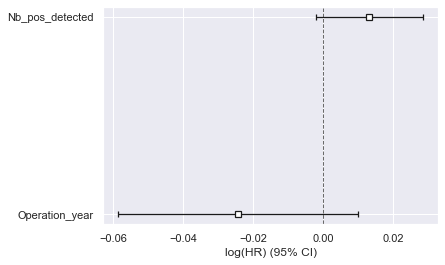

In [385]:
cph.plot()

Les statistiques récapitulatives ci-dessus indiquent l'importance des covariables dans la prédiction du risque de survie.
* l'année de l'opération est négative, indiquant l'amélioration de l'espérance de survie récente (probablement par un geste opératoire mieux maitrisé)
* le nombre de ganglions infecté est positif, indiquant une déterioration de l'espérance de vie.
* L'intervalle de confiance est néanmoins assez large.
 


# Exercices


 

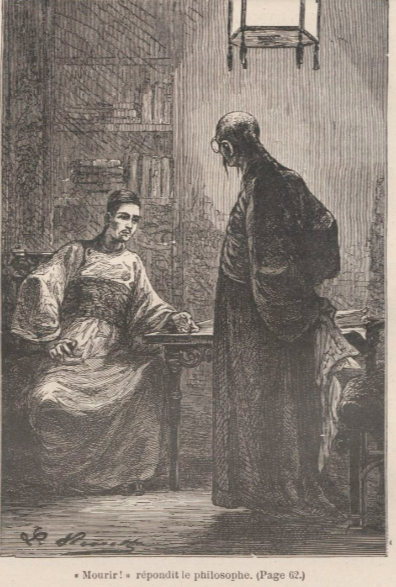

# Et si on ajoutait un état ?